


<img src="https://seaborn.pydata.org/_images/logo-wide-lightbg.svg" width="30%" height="30%" />

# Seaborn Lesson - Unit 05 - Seaborn Plots: Part 03

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%202%20-%20Unit%20Objective.png"> Unit Objectives

* Learn and deliver heatmap, line plot and categorical plot in Seaborn



---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%204%20-%20Import%20Package%20for%20Learning.png"> Import Package for Learning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Seaborn Plots: Part 03

We will cover in this unit the following plots:
* Heatmap
* Line plot
* Categorical plot

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Heatmap

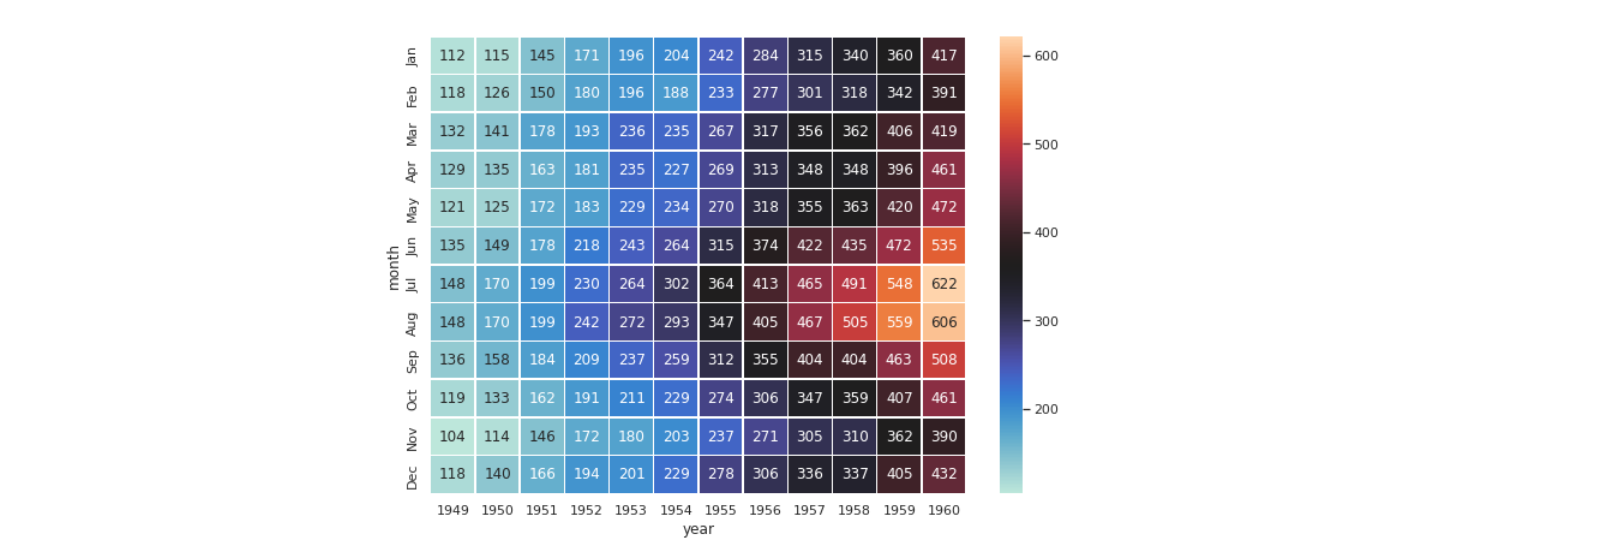

A heatmap represents data as a map or diagram, showing the magnitude/intensity of numerical values represented with colours.
* You can use a heatmap to represent a numerical variable over 2 dimensions, for example:
  * A correlation plot, where there is a table with columns and indices representing the dataset variables, and each value in the table represents the correlation between 2 variables
  * Variation over time, where for example, you have a table where columns represent month and indices year, and each value in the table represents a given numerical value (like sales of some product, number of passengers etc) in a given month of a given year


Consider the following dataset
  * It has records for 3 different species of penguins, collected from 3 islands in the Palmer Archipelago, Antarctica

df = sns.load_dataset('penguins')
df = df.sample(n=50, random_state=1)
df.head(3)

We will calculate correlation levels using pearson, that means we want to get the liner correlation among the variables

df_corr = df.corr(method='pearson')
df_corr

A heatmap with `sns.heatmap()` plots rectangular data as a color-encoded matrix. The function documentation is [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html). The argumetns are:

* data, 
* `annot=True` to display the number in each cell, 
* `linewidth` to create a grid of cells, making the plot more visual; 
* and `cmap` for setting the color [palette](https://seaborn.pydata.org/tutorial/color_palettes.html), you can also use [Matplotlib palette](https://matplotlib.org/stable/tutorials/colors/colormaps.html) 
* You also set the annotation font size with `annot_kws={size}`






sns.set_theme(style="whitegrid")
sns.heatmap(data=df_corr, annot=True, linewidths=0.5, annot_kws={"size": 8},cmap='viridis')
plt.show()

In correlation heatmaps, it is worth removing the upper part, since it is repeated information.




* We create a mask to hide the upper part. We do that in the first 2 lines of code where we create an array of zeros and set as true the upper diagonal. The upper diagonal will be hidden when you parse mask=mask at `sns.heatmap()` We will study in more details correlation in upcoming lessons

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_corr,annot=True,mask=mask,cmap='viridis',annot_kws={"size": 8},linewidths=0.5)
plt.ylim(df_corr.shape[1],0);
plt.show()

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE** We will use the DataFrame below, which uses the iris dataset to practice with. 

df_practice = sns.load_dataset('iris')
df_practice = df_practice.sample(n=50, random_state=1)
df_practice.head()


Feel free to try out your ideas or use the following suggestion.

Create a heatmap from the ``iris`` dataset, calculating the correlation levels using pearson and removing the upper part since it is repeated information.

# Write your code here.
df_numeric = df_practice.select_dtypes(include='number')
sns.heatmap(data=df_numeric , annot=True, linewidths=0.5, annot_kws={"size": 8} , cmap='viridis')
plt.show()

---

Let's consider now this dataset
* It shows flight passenger records from 1949 to 1960. Seaborn doesn't provide additional information on passenger magnitude.

df = sns.load_dataset("flights")
df.head()

You can pivot the data with a Pandas function we studied already: `pd.pivot_table()`
* That genarates a table where columns are related to year and indices to month. Each cell shows the passanger record for a given month in a given year

df_pivot = pd.pivot_table(data=df, index='month', columns='year', values='passengers')
df_pivot

We plot a heatmap using `sns.heatmap()`
* We don't need to mask cells here, since each cell represents unique information

fig, axes = plt.subplots(figsize=(10,7))
sns.heatmap(data=df_pivot, annot=True, linewidths=.5, cmap='icefire')
plt.show()

`fmt` is a string formatting code to use when adding annotations. `fmt="0.f"` it changes the default scientific notation to "zero" decimal precision. It could be one decimal precision, two decimal precision. It will depend on your usecase

 * Can you identify the months where the demand is tpyically higher? You may say in the middle of the year, which happens to be summer in the north hemisphere.
* Can you notice that the levels increased over the years?


fig, axes = plt.subplots(figsize=(10,7))
sns.heatmap(data=df_pivot, annot=True, fmt=".0f", linewidths=.5, cmap='icefire')
plt.show()

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Line Plot

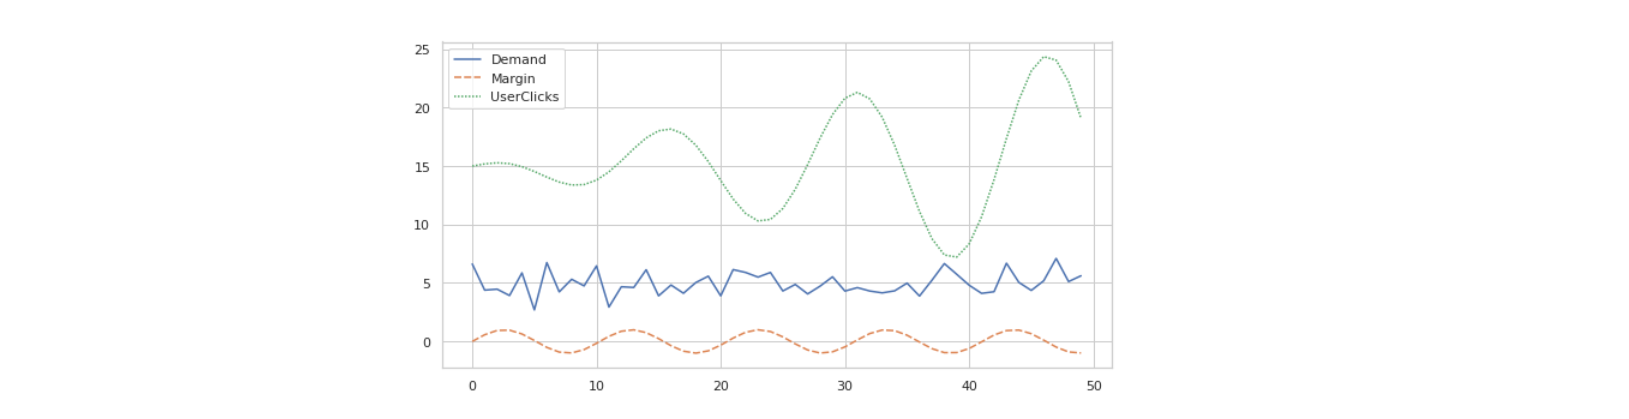

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> A line plot displays information as a series of data points in a 2 dimensinal chart - x and y axis. 
* It allows you to see the relationship between variables

Let's generate some data with NumPy, there are 3 columns created with mathematical functions
* For the purpose of the exercise, let's imagine they are a business metric, like Demand, Margin, and UserClicks

np.random.seed(seed=1)
x= np.linspace(start=0,stop=10,num=50)
df = pd.DataFrame(data={"Demand":np.random.randn(50) + 5,
                        "Margin":np.sin(3*x),
                        "UserClicks":15 + np.cos(2*x) * x,
})

df.head(3)

We use `sns.lineplot()`, the documentation is [here](https://seaborn.pydata.org/generated/seaborn.lineplot.html). When you  parse the dataset, it plots a line plot for each numerical variable in the y axis and the x axis is the index
* Alternatively, you can manually set the y and x. In our case, we just parsed the data

fig, axes = plt.subplots(figsize=(10,5))
sns.lineplot(data=df)
plt.show()

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Categorical Plot


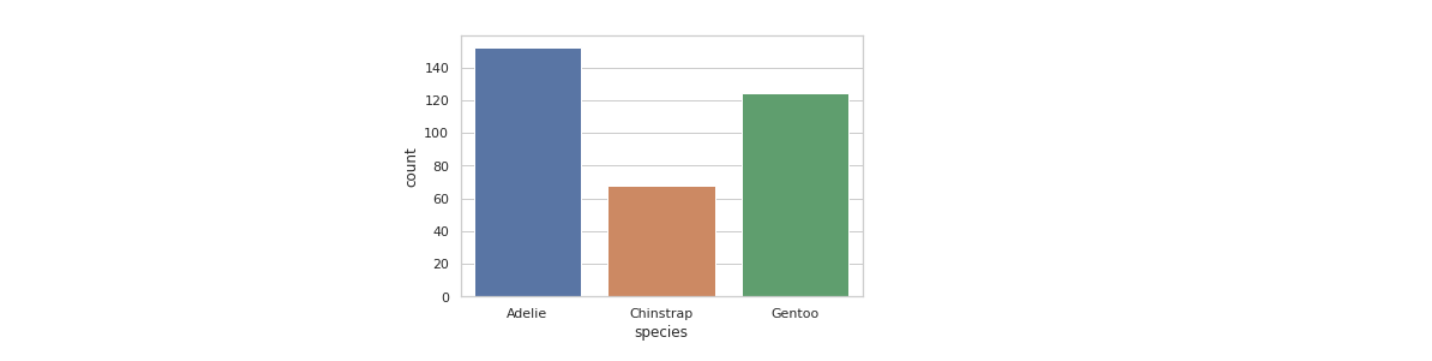

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> According to Seaborn [documentation](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot), a Count Plot show the counts of observations in each categorical bin using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

Consider the following dataset
  * It has records for 3 different species of penguins, collected from 3 islands in the Palmer Archipelago, Antarctica

df = sns.load_dataset('penguins')
df = df.sample(n=50, random_state=1)
df.head(3)

We use `sns.countplot()` to generate a count plot, the documentation is [here](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot). The arguments we parse are:
* data as the DataFrane, and x for the categorical variable we want to know plot the count

sns.countplot(data=df, x="species")
plt.show()

You can add a hue parameter, which will be a categorical variable too. In that way you can see frequencies of a given variable on another variable
* You will notice the bars are not stacked, they are side by side

sns.countplot(data=df, x="species", hue='island')
plt.show()

The function `sns.countplot()` does not offer a stacked bar plot. To have the same effect of a stacked bar plot, you can use s`ns.distplot() `

sns.displot(df, x='species', hue='island', multiple='stack')
plt.show()

Alternatively, you can consider Pandas built-in plotting capabilities. The central aspect is that you have options when you want to deliver a stacked bar plot

df.groupby(['species','island']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE** Feel free to try out your ideas or use the following suggestion.

Using the tips dataset, create a Categorical plot that should display the count of the number of Dinners and Lunches for each of the Days

df_practice = sns.load_dataset('tips')
df_practice = df_practice.sample(n=50, random_state=1)
df_practice.head(3)

# Write your code here.
sns.countplot(data=df_practice , x='time' , hue='day')
plt.show()

---